## Desafio de Dados Enem

### Catia Michele Tondolo



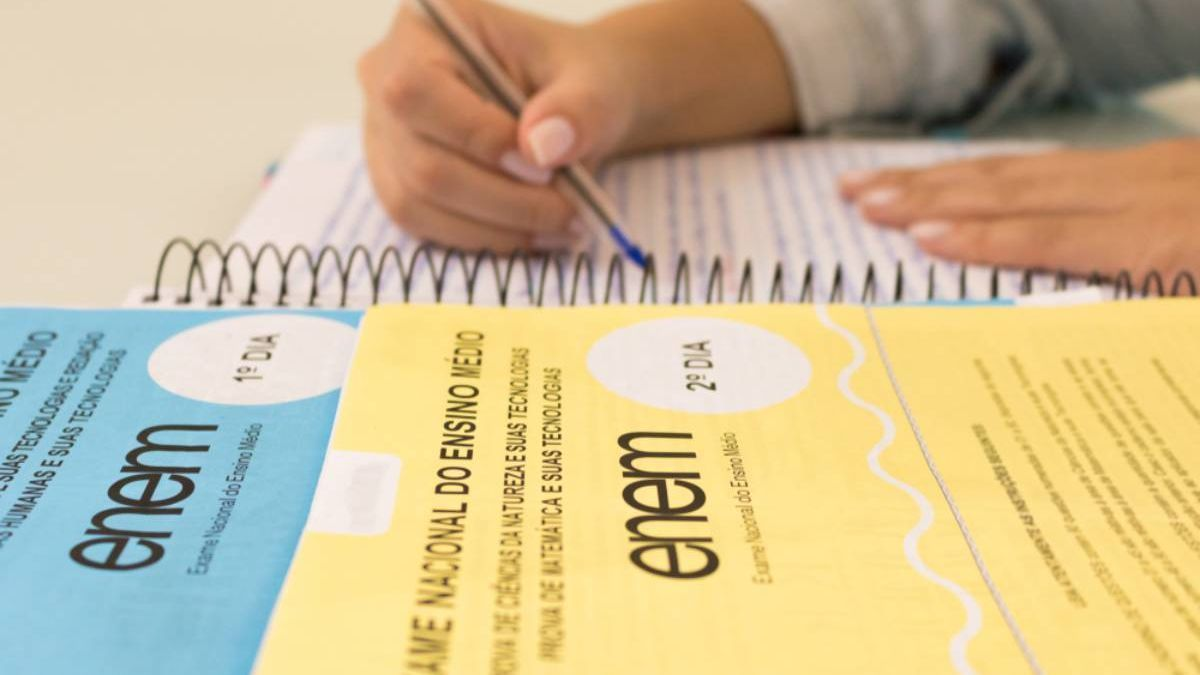

A principal forma de ingresso no ensino superior atualmente no Brasil é através do Exame Nacional do Ensino Médio, o ENEM. Realizado anualmente, requer uma redação e questões objetivas, divididas em quatro grandes áreas: Ciências Humanas e suas Tecnologias, Ciências da Natureza e suas Tecnologias, Linguagens, Códigos e suas Tecnologias e Matemática e suas Tecnologias.

Neste desafio teremos uma análise exploratória dos dados pontuando as conclusões observadas.

#### Importando pacotes que serão utéis durante o desenvolvimento

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np

import seaborn as sns
import re
import patsy
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from scipy import stats

from plotnine import *
from siuba import *

import timeit

%matplotlib inline

import tkinter
from matplotlib import style
%matplotlib inline
style.use("ggplot")
theme_set(theme_bw())

np.warnings.filterwarnings('ignore')

#### Leitura do banco de dados

Dados referentes aas notas do Enem de 2019 de Minas Gerais.

In [3]:
# ITENS DA PROVA

ItensProva = pd.read_csv('../Anima/DADOS/ITENS_PROVA_2019.csv', sep=";")

ItensProva.head(10)

,CO_POSICAO,SG_AREA,CO_ITEM,TX_GABARITO,CO_HABILIDADE,TX_COR,CO_PROVA,TP_LINGUA,IN_ITEM_ADAPTADO
0,1,LC,55166,B,7,Azul,511,0.0,0
1,2,LC,54110,D,7,Azul,511,0.0,0
2,3,LC,23564,A,6,Azul,511,0.0,0
3,4,LC,31954,B,8,Azul,511,0.0,0
4,5,LC,118180,E,5,Azul,511,0.0,0
5,1,LC,96705,A,8,Azul,511,1.0,0
6,2,LC,118222,B,5,Azul,511,1.0,0
7,3,LC,39016,C,7,Azul,511,1.0,0
8,4,LC,118167,A,8,Azul,511,1.0,0
9,5,LC,48558,D,6,Azul,511,1.0,0


In [4]:
# DADOS MG 2019

Enem_MG_2019 = pd.read_csv('../Anima/DADOS/dado_mg.csv', sep=";")

Enem_MG_2019.head(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B
1,190001237803,2019,3170206,Uberlândia,31,MG,30.0,F,1,2,...,A,A,A,B,A,A,B,A,A,A
2,190001237804,2019,3124104,Esmeraldas,31,MG,27.0,M,1,3,...,A,A,A,B,A,B,C,A,A,A
3,190001237805,2019,3118304,Conselheiro Lafaiete,31,MG,22.0,F,1,1,...,B,A,B,C,B,A,E,A,B,B
4,190001237806,2019,3162922,São Joaquim de Bicas,31,MG,23.0,F,1,4,...,B,A,A,B,B,A,C,A,B,B
5,190001237807,2019,3104007,Araxá,31,MG,19.0,M,1,1,...,B,A,A,B,A,A,D,A,B,B
6,190001237808,2019,3143302,Montes Claros,31,MG,35.0,M,2,3,...,B,A,A,B,B,B,C,A,B,B
7,190001237809,2019,3157005,Salinas,31,MG,20.0,M,1,3,...,A,A,A,B,A,A,E,A,B,B
8,190001237810,2019,3106200,Belo Horizonte,31,MG,31.0,F,2,0,...,B,A,B,B,A,A,C,A,B,B
9,190001237811,2019,3162104,São Gotardo,31,MG,17.0,F,1,2,...,B,A,A,B,B,A,C,A,B,B


In [5]:
# informações de faltantes em linhas e colunas 
def num_missing(x):
  return sum(x.isnull())

#Aplica por coluna:
print ("Valor faltante por coluna:")
print (Enem_MG_2019.apply(num_missing, axis=0)) 

#Aplica por linha:
print ("\nValor faltante por linha:")
print (Enem_MG_2019.apply(num_missing, axis=1).head())

Valor faltante por coluna:
NU_INSCRICAO               0
NU_ANO                     0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
CO_UF_RESIDENCIA           0
                          ..
Q021                       0
Q022                       0
Q023                       0
Q024                       0
Q025                       0
Length: 136, dtype: int64

Valor faltante por linha:
0     8
1    23
2    13
3     8
4     8
dtype: int64


In [6]:
pd.DataFrame({'tipos':Enem_MG_2019.dtypes, 'missing':Enem_MG_2019.isna().sum()}) # aqui podemos ver os tipos

,tipos,missing
NU_INSCRICAO,int64,0
NU_ANO,int64,0
CO_MUNICIPIO_RESIDENCIA,int64,0
NO_MUNICIPIO_RESIDENCIA,object,0
CO_UF_RESIDENCIA,int64,0
...,...,...
Q021,object,0
Q022,object,0
Q023,object,0
Q024,object,0


Escolhendo algumas váriáveis escolhidas para análise.

In [7]:
columns = ['NU_INSCRICAO','NU_ANO','CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA',
'SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA','TP_ENSINO',
          'Q001','Q002','Q006','Q024','Q025']

Enem_MG_2019DescSocioEcon = pd.DataFrame(Enem_MG_2019, columns=columns)

In [8]:
# número de linhas

Enem_MG_2019DescSocioEcon.shape[0]

534627

#### Tratar variáveis qualitativas

In [9]:
# estado civil
Enem_MG_2019DescSocioEcon['TP_ESTADO_CIVIL'] = Enem_MG_2019DescSocioEcon['TP_ESTADO_CIVIL'].map({0:'NI', 1:'Solteiro', 2:'Casado', 3:'Divorciado',
                                               4:'Viúvo'})

In [10]:
# cor ou raça
Enem_MG_2019DescSocioEcon['TP_COR_RACA'] = Enem_MG_2019DescSocioEcon['TP_COR_RACA'].map({0:'ND', 1:'Branca', 2:'Preta', 3:'Parda',
                                               4:'Amarela', 5:'Indígena'})

In [11]:
#Escolaridade do pai
Enem_MG_2019DescSocioEcon['Q001'] = Enem_MG_2019DescSocioEcon['Q001'].map({'A':'Nunca estudou', 'B':'Não completou EF1', 'C':'Não completou EF2',
                                'D':'Não completou EM', 'E':'Completou EM', 'F':'Graduado',
                                'G':'Pós-graduado','H':'Não sabe'})

In [12]:
#Escolaridade da mãe
Enem_MG_2019DescSocioEcon['Q002'] = Enem_MG_2019DescSocioEcon['Q002'].map({'A':'Nunca estudou', 'B':'Não completou EF1', 'C':'Não completou EF2',
                                'D':'Não completou EM', 'E':'Completou EM', 'F':'Graduada',
                                'G':'Pós-graduada','H':'Não sabe'})

In [13]:
#Renda familiar (incluindo a do aluno)
Enem_MG_2019DescSocioEcon['Q006'] = Enem_MG_2019DescSocioEcon['Q006'].map({'A':'Nenhuma renda', 'B':'Até 998', 'C':'Até 1.497',
                                 'D':'Até 1.996', 'E':'Até 2.495', 'F':'Até 2.994', 'G':'Até 3.992',
                                 'H':'Até 4.990','I':'Até 5.988', 'J':'Até 6.986','K':'Até 7.984',
                                 'L':'Até 8.982','M':'Até 9.980','N':'Até 11.976',
                                 'O':'Até 14.970','P':'Até 19.960','Q':'Mais de 19.960'})

In [14]:
#Possui computador em casa?
Enem_MG_2019DescSocioEcon['Q024'] = Enem_MG_2019DescSocioEcon['Q024'].map({'A':'Não', 'B':'Sim, 1', 'C':'Sim, 2',
                                                                           'D':'Sim, 3', 'E':'Sim, 4 ou +'})

In [15]:
#Possui internet em casa?
Enem_MG_2019DescSocioEcon['Q025'] = Enem_MG_2019DescSocioEcon['Q025'].map({'A':'Não', 'B':'Sim'})

#### Algumas análises iniciais

In [16]:
#porcentagem de cada sexo na amostra

Enem_MG_2019DescSocioEcon['TP_SEXO'].value_counts()/Enem_MG_2019DescSocioEcon.shape[0]*100

F    60.530239
M    39.469761
Name: TP_SEXO, dtype: float64

Primeiro, percebemos que uma porcentagem alta de mulheres (60,5%) tentaram o ENEm em 2019 no estado de MG.

In [17]:
#porcentagem de cada cor/raça na amostra

Enem_MG_2019DescSocioEcon['TP_COR_RACA'].value_counts()/Enem_MG_2019DescSocioEcon.shape[0]*100

Parda       43.480969
Branca      37.825998
Preta       14.056155
Amarela      2.204902
ND           2.031884
Indígena     0.400092
Name: TP_COR_RACA, dtype: float64

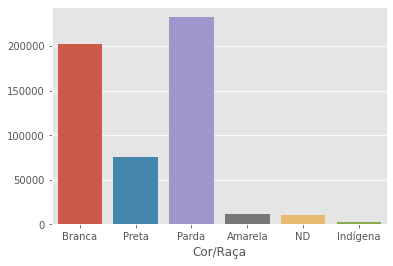

In [18]:
sns.countplot(Enem_MG_2019DescSocioEcon['TP_COR_RACA'])
plt.xlabel('Cor/Raça')
plt.ylabel("")
plt.show()

Quase 44% dos estudantes se consideram 'pardos'. Somando esses aos 'pretos', temos quase 58% dos estudantes.

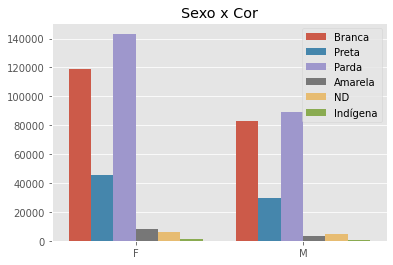

In [19]:
sns.countplot(Enem_MG_2019DescSocioEcon['TP_SEXO'],hue=Enem_MG_2019DescSocioEcon['TP_COR_RACA'], dodge=True)
plt.title('Sexo x Cor')
plt.xlabel('')
plt.ylabel("")
plt.legend(loc='best')
plt.show()

Dentre os estudantes a maioria se encontra em 'pardos' e 'pretos' como citado anteriormente e podemos ver sua distribuição nos diferentes sexos.

In [20]:
# as 20 cidades com maior número de participantes

Enem_MG_2019DescSocioEcon.value_counts(['NO_MUNICIPIO_RESIDENCIA']).to_frame("n").reset_index().head(20)


,NO_MUNICIPIO_RESIDENCIA,n
0,Belo Horizonte,79263
1,Uberlândia,21268
2,Contagem,18133
3,Montes Claros,17116
4,Juiz de Fora,15806
5,Betim,10875
6,Governador Valadares,8422
7,Ribeirão das Neves,8391
8,Uberaba,8093
9,Divinópolis,6864


In [21]:
Enem_MG_2019DescSocioEcon.value_counts(['NO_MUNICIPIO_RESIDENCIA'])[0:9].sum()/Enem_MG_2019DescSocioEcon.shape[0]*100

35.04630331053239

Podemos visualizar as 20 cidades com maior número de inscritos no estado MG. A primeiras 10 cidades compreendem mais de 35% dos candidatos.

In [22]:
#Possui internet em casa?
Enem_MG_2019DescSocioEcon['Q025'].value_counts()/Enem_MG_2019DescSocioEcon.shape[0]*100

Sim    84.367606
Não    15.632394
Name: Q025, dtype: float64

Percebemos que a grande maioria do candidatos do estado de MG possui acesso a internet. Uma informação importante sobre o perfil do estudante, pois parte do desenvolvimento de suas funções como graduando é completar seus estudos e pesquisas por conta própia utilizando a internet.

In [23]:
#Escolaridade da mãe
Enem_MG_2019DescSocioEcon['Q002'].value_counts()/Enem_MG_2019DescSocioEcon.shape[0]*100

Completou EM         29.738116
Não completou EF1    17.498368
Não completou EF2    15.724421
Não completou EM     12.648819
Graduada             10.486938
Pós-graduada          9.013013
Nunca estudou         2.631180
Não sabe              2.259145
Name: Q002, dtype: float64

A maior parte das mães dos estudantes não completou o Ensino Fundamental (33,22%) e o Ensino Médio (12,64%), além de que uma parte (2,6%) nunca estudou.

In [24]:
#Escolaridade do pai
Enem_MG_2019DescSocioEcon['Q001'].value_counts()/Enem_MG_2019DescSocioEcon.shape[0]*100

Completou EM         24.005148
Não completou EF1    23.509849
Não completou EF2    17.289811
Não completou EM     12.054386
Não sabe              7.551059
Graduado              7.409465
Pós-graduado          4.619669
Nunca estudou         3.560613
Name: Q001, dtype: float64

Dentre os pais dos estudantes não completou o Ensino Fundamental (40,78%) e o Ensino Médio (12,05%), além de que uma parte relativamente alta (3,6%) nunca estudou, próximo a porcentagem de pais com pós graduação.

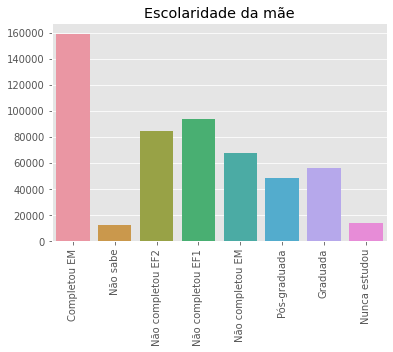

In [25]:
sns.countplot(Enem_MG_2019DescSocioEcon['Q002'])
plt.title('Escolaridade da mãe')
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

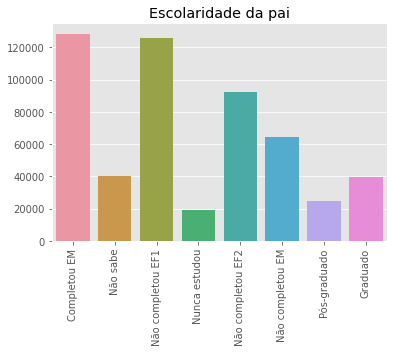

In [26]:
sns.countplot(Enem_MG_2019DescSocioEcon['Q001'])
plt.title('Escolaridade do pai')
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

Gráficos das informações de escolaridades feitos para complementar a visualização e informações calculadas.

In [27]:
#Renda da familia, incluindo a do aluno
Enem_MG_2019DescSocioEcon['Q006'].value_counts()/Enem_MG_2019DescSocioEcon.shape[0]*100

Até 1.497         26.393168
Até 998           18.096729
Até 1.996         11.754176
Até 2.495         11.420860
Até 3.992          7.377293
Até 2.994          5.438932
Até 4.990          4.479946
Até 5.988          3.294821
Nenhuma renda      2.353791
Até 6.986          1.779933
Até 11.976         1.343179
Até 7.984          1.302029
Até 14.970         1.084494
Mais de 19.960     1.060178
Até 8.982          0.987604
Até 9.980          0.961231
Até 19.960         0.871636
Name: Q006, dtype: float64

A maior parte das famílias (56,25%) tem renda total mensal de até R\\$1.996,00. Além disso, tem mais gente sem renda (2,35%) que famílias com renda de mais de R\\$14.971,00 (1,93%);

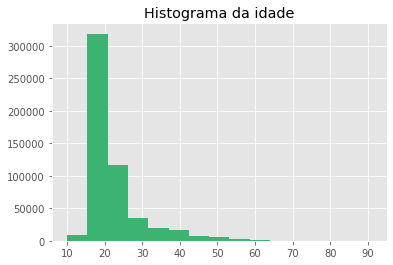

In [28]:
# histograma das idades dos participantes da prova
plt.hist(Enem_MG_2019DescSocioEcon['NU_IDADE'],bins=15, histtype='bar', color='#3CB371')
plt.title('Histograma da idade')
plt.show()

Acima, temos o histograma das idades dos candidatos onde a maioria encontra-se na faixa dos 15-25 anos. Chamou atenção o valor mais baixo do histograma e então faremos uma descritiva das idades.

In [94]:
Enem_MG_2019DescSocioEcon['NU_IDADE'].describe()

count    534620.000000
mean         22.038278
std           7.470671
min          10.000000
25%          18.000000
50%          19.000000
75%          23.000000
max          91.000000
Name: NU_IDADE, dtype: float64

Verificamos que a idade mínima de um candidato foi de 10 anos de idade (erro do dataset?). E temos um candidato de 91 anos. E que a maior parte dos estudantes (75%) tem menos de 23 anos.

Essa foi uma primeira análise com algumas variáveis que determinei importante para um primeiro perfil dos candidaros do estado de MG. Agora fazendo uma análise do ponto de vista de um provedor educacional considerei importante fazer uma breve análise sobre pedidos de atendimento especializado e seus indicadores para possíveis dados de melhoria voltadas à educação inclusiva. Buscando compreender as diferentes necessidades de cada aluno, tenha ele alguma deficiência ou não, proporcionando a  convivência de todos em salas de aula comuns e oferecendo o suporte necessário para cada um deles ao longo do processo.

#### Indicadores de acessibilidade

In [112]:
columns = ['NU_INSCRICAO','IN_BAIXA_VISAO','IN_CEGUEIRA','IN_SURDEZ','IN_DEFICIENCIA_AUDITIVA','IN_SURDO_CEGUEIRA',
'IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO','IN_DISLEXIA','IN_DISCALCULIA',
'IN_AUTISMO','IN_VISAO_MONOCULAR','IN_OUTRA_DEF']

Enem_MG_2019Indic = pd.DataFrame(Enem_MG_2019, columns=columns)

In [113]:
#Possui baixa visão?
Enem_MG_2019Indic['IN_BAIXA_VISAO'] = Enem_MG_2019Indic['IN_BAIXA_VISAO'].map({'0':'Não', '1':'Sim'})

In [120]:
Enem_MG_2019Indic['IN_BAIXA_VISAO'].value_counts()

Series([], Name: IN_BAIXA_VISAO, dtype: int64)

In [115]:
#Possui cegueira?
Enem_MG_2019Indic['IN_CEGUEIRA'] = Enem_MG_2019Indic['IN_CEGUEIRA'].map({'0':'Não', '1':'Sim'})

In [119]:
Enem_MG_2019Indic['IN_CEGUEIRA'].value_counts()

Series([], Name: IN_CEGUEIRA, dtype: int64)

In [99]:
#Possui surdez?
Enem_MG_2019Indic['IN_SURDEZ'] = Enem_MG_2019Indic['IN_SURDEZ'].map({'0':'Não', '1':'Sim'})

In [118]:
Enem_MG_2019Indic['IN_SURDEZ'].value_counts()

0    534495
1       132
Name: IN_SURDEZ, dtype: int64

In [100]:
#Possui deficiência auditiva?
Enem_MG_2019Indic['IN_DEFICIENCIA_AUDITIVA'] = Enem_MG_2019Indic['IN_DEFICIENCIA_AUDITIVA'].map({'0':'Não', '1':'Sim'})

In [121]:
Enem_MG_2019Indic['IN_DEFICIENCIA_AUDITIVA'].value_counts()

0    534367
1       260
Name: IN_DEFICIENCIA_AUDITIVA, dtype: int64

In [101]:
#Possui surdo_cego?
Enem_MG_2019Indic['IN_SURDO_CEGUEIRA'] = Enem_MG_2019Indic['IN_SURDO_CEGUEIRA'].map({'0':'Não', '1':'Sim'})

In [122]:
Enem_MG_2019Indic['IN_SURDO_CEGUEIRA'].value_counts()

0    534616
1        11
Name: IN_SURDO_CEGUEIRA, dtype: int64

In [102]:
#Possui deficiência física?
Enem_MG_2019Indic['IN_DEFICIENCIA_FISICA'] = Enem_MG_2019Indic['IN_DEFICIENCIA_FISICA'].map({'0':'Não', '1':'Sim'})

In [123]:
Enem_MG_2019Indic['IN_DEFICIENCIA_FISICA'].value_counts()

0    533810
1       817
Name: IN_DEFICIENCIA_FISICA, dtype: int64

In [103]:
#Possui deficiência mental?
Enem_MG_2019Indic['IN_DEFICIENCIA_MENTAL'] = Enem_MG_2019Indic['IN_DEFICIENCIA_MENTAL'].map({'0':'Não', '1':'Sim'})

In [124]:
Enem_MG_2019Indic['IN_DEFICIENCIA_MENTAL'].value_counts()

0    534401
1       226
Name: IN_DEFICIENCIA_MENTAL, dtype: int64

In [104]:
#Possui deficit atenção?
Enem_MG_2019Indic['IN_DEFICIT_ATENCAO'] = Enem_MG_2019Indic['IN_DEFICIT_ATENCAO'].map({'0':'Não', '1':'Sim'})

In [125]:
Enem_MG_2019Indic['IN_DEFICIT_ATENCAO'].value_counts()

0    532688
1      1939
Name: IN_DEFICIT_ATENCAO, dtype: int64

In [105]:
#Possui dislexia?
Enem_MG_2019Indic['IN_DISLEXIA'] = Enem_MG_2019Indic['IN_DISLEXIA'].map({'0':'Não', '1':'Sim'})

In [126]:
Enem_MG_2019Indic['IN_DISLEXIA'].value_counts()

0    534402
1       225
Name: IN_DISLEXIA, dtype: int64

In [106]:
#Possui discalculia?
Enem_MG_2019Indic['IN_DISCALCULIA'] = Enem_MG_2019Indic['IN_DISCALCULIA'].map({'0':'Não', '1':'Sim'})

In [127]:
Enem_MG_2019Indic['IN_DISCALCULIA'].value_counts()

0    534556
1        71
Name: IN_DISCALCULIA, dtype: int64

In [107]:
#Possui autismo?
Enem_MG_2019Indic['IN_AUTISMO'] = Enem_MG_2019Indic['IN_AUTISMO'].map({'0':'Não', '1':'Sim'})

In [128]:
Enem_MG_2019Indic['IN_AUTISMO'].value_counts()

0    534468
1       159
Name: IN_AUTISMO, dtype: int64

In [108]:
#Possui visão monocular?
Enem_MG_2019Indic['IN_VISAO_MONOCULAR'] = Enem_MG_2019Indic['IN_VISAO_MONOCULAR'].map({'0':'Não', '1':'Sim'})

In [129]:
Enem_MG_2019Indic['IN_VISAO_MONOCULAR'].value_counts()

0    534503
1       124
Name: IN_VISAO_MONOCULAR, dtype: int64

In [109]:
#Possui outra deficiência?
Enem_MG_2019Indic['IN_OUTRA_DEF'] = Enem_MG_2019Indic['IN_OUTRA_DEF'].map({'0':'Não', '1':'Sim'})

In [130]:
Enem_MG_2019Indic['IN_OUTRA_DEF'].value_counts()

0    534225
1       402
Name: IN_OUTRA_DEF, dtype: int64

Acho importante mapear os indicadores como dito para que as instituições tenham no seu radar as possíveis necessidades dentre os candidatos. Os indicadores surdo, deficiente auditivo, surdo+cego, deficiência física, deficiência mental, deficit de atenção, dislexia, discalculia, autismo, visão monocular e outras deficiências somam 4366 candidatos representando 1% dos candidatos do estado. Essas informações além de importantes estruturalmente para as instituições podem também fazer parte de estatísticas de evasão, reprovações e etc. A acessibilidade é, antes de tudo, o conjunto de condições e possibilidades para que todas as pessoas possam utilizar os espaços, sejam eles públicos ou privados, com autonomia e segurança.

#### Avaliação de desempenho das notas dos candidatos

In [29]:
columns = ['NU_INSCRICAO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','CO_PROVA_CN','CO_PROVA_CH',
'CO_PROVA_LC','CO_PROVA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TX_RESPOSTAS_CN',
'TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TP_LINGUA','TX_GABARITO_CN','TX_GABARITO_CH',
'TX_GABARITO_LC','TX_GABARITO_MT','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
'NU_NOTA_REDACAO']

Enem_MG_2019Prova = pd.DataFrame(Enem_MG_2019, columns=columns)

In [30]:
Enem_MG_2019Prova.head(15)

,NU_INSCRICAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,...,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,190001237802,1,1,1,1,504.0,510.0,513.0,516.0,513.6,...,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,120.0,180.0,200.0,200.0,860.0
1,190001237803,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,190001237804,1,1,1,1,503.0,509.0,514.0,515.0,394.3,...,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,140.0,140.0,120.0,120.0,80.0,600.0
3,190001237805,1,1,1,1,505.0,509.0,514.0,518.0,560.0,...,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,120.0,60.0,540.0
4,190001237806,1,1,1,1,504.0,508.0,512.0,516.0,504.2,...,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,120.0,120.0,100.0,580.0
5,190001237807,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,190001237808,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,190001237809,1,1,1,1,504.0,507.0,511.0,516.0,601.6,...,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,140.0,180.0,200.0,160.0,840.0
8,190001237810,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,190001237811,0,1,1,0,NaN,509.0,514.0,NaN,NaN,...,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,NaN,1.0,120.0,100.0,100.0,100.0,80.0,500.0


#### Vamos ver e tratar os valores faltantes

In [31]:
pd.DataFrame({'tipos':Enem_MG_2019Prova.dtypes, 'missing':Enem_MG_2019Prova.isna().sum()})

,tipos,missing
NU_INSCRICAO,int64,0
TP_PRESENCA_CN,int64,0
TP_PRESENCA_CH,int64,0
TP_PRESENCA_LC,int64,0
TP_PRESENCA_MT,int64,0
CO_PROVA_CN,float64,143772
CO_PROVA_CH,float64,123452
CO_PROVA_LC,float64,123452
CO_PROVA_MT,float64,143772
NU_NOTA_CN,float64,143772


Os dados faltantes são provavelmente alunos que fizeram a inscrição no ENEM e não compareceram nos dias das provas.

In [32]:
Enem_MG_2019Prova2 = Enem_MG_2019Prova.dropna()

In [33]:
pd.DataFrame({'tipos':Enem_MG_2019Prova2.dtypes, 'missing':Enem_MG_2019Prova2.isna().sum()})

,tipos,missing
NU_INSCRICAO,int64,0
TP_PRESENCA_CN,int64,0
TP_PRESENCA_CH,int64,0
TP_PRESENCA_LC,int64,0
TP_PRESENCA_MT,int64,0
CO_PROVA_CN,float64,0
CO_PROVA_CH,float64,0
CO_PROVA_LC,float64,0
CO_PROVA_MT,float64,0
NU_NOTA_CN,float64,0


#### Histograma das notas em matemática

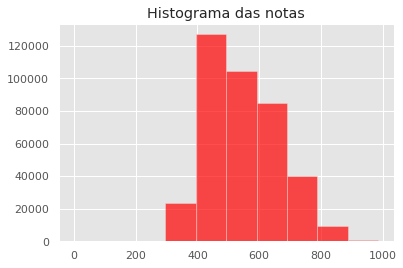

In [149]:
plt.hist(Enem_MG_2019Prova2['NU_NOTA_MT'], alpha=0.7, color='red')
plt.title('Histograma das notas')
plt.show()

In [150]:
Enem_MG_2019Prova2['NU_NOTA_MT'].describe()

count    390085.000000
mean        547.060844
std         115.022546
min           0.000000
25%         451.900000
50%         531.600000
75%         630.100000
max         985.500000
Name: NU_NOTA_MT, dtype: float64

#### Histograma das notas em ciências humanas

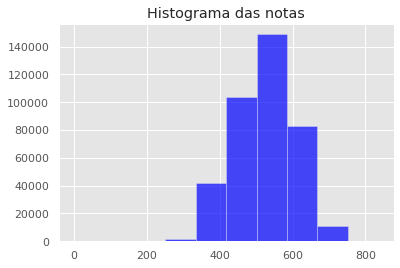

In [146]:
plt.hist(Enem_MG_2019Prova2['NU_NOTA_CH'], alpha=0.7, color='blue')
plt.title('Histograma das notas')
plt.show()

In [151]:
Enem_MG_2019Prova2['NU_NOTA_CH'].describe()

count    390085.000000
mean        523.841186
std          81.447197
min           0.000000
25%         466.200000
50%         529.500000
75%         582.300000
max         835.100000
Name: NU_NOTA_CH, dtype: float64

#### Histograma das notas em ciências da natureza

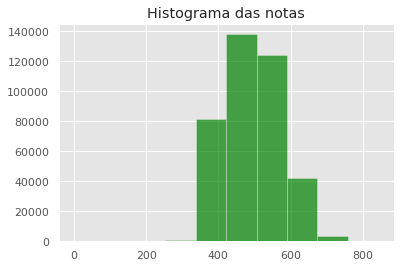

In [147]:
plt.hist(Enem_MG_2019Prova2['NU_NOTA_CN'], alpha=0.7, color='green')
plt.title('Histograma das notas')
plt.show()

In [152]:
Enem_MG_2019Prova2['NU_NOTA_CN'].describe()

count    390085.000000
mean        492.557779
std          77.876329
min           0.000000
25%         430.600000
50%         489.500000
75%         551.200000
max         842.800000
Name: NU_NOTA_CN, dtype: float64

#### Histograma das notas em linguagem e códigos

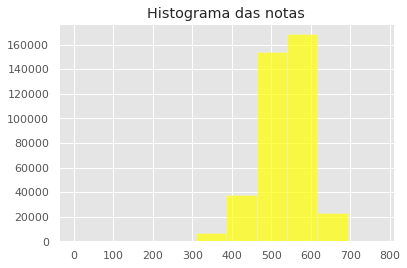

In [148]:
plt.hist(Enem_MG_2019Prova2['NU_NOTA_LC'], alpha=0.7, color='yellow')
plt.title('Histograma das notas')
plt.show()

In [153]:
Enem_MG_2019Prova2['NU_NOTA_LC'].describe()

count    390085.000000
mean        533.282859
std          59.490550
min           0.000000
25%         499.600000
50%         538.200000
75%         574.300000
max         770.500000
Name: NU_NOTA_LC, dtype: float64

Notas das provas:

- a média de notas em matemática é de 547, elas tem maior variação (desvio padrão) em torno da média e a nota máxima é maior;

- a média de notas em ciências humanas é de aproximadamente 524 e possuem uma variação de 81 em tordo da média de notas;

- a média de notas em ciências da natureza é de aproximadamente 493 e possuem uma variação de 78 em tordo da média de notas;

- a média de notas em linguagens e códigos é de aproximadamente 533 e possuem uma variação de 59 em tordo da média de notas a menor variação dentre as provas.

#### Aplicar um merge nos bancos criados para analisar notas com sexo e idade dos candidatos

In [34]:
Enem_MG_2019Prova3 = pd.merge(Enem_MG_2019Prova2, Enem_MG_2019DescSocioEcon, how = 'inner', on = ['NU_INSCRICAO'])

#### Avaliando desempenho de notas nas diferentes provas segundo a idade dos participantes

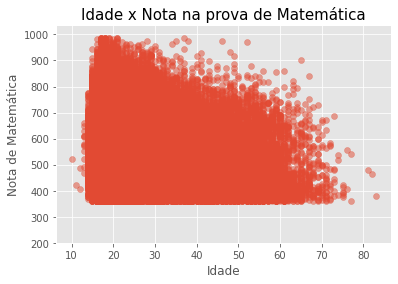

In [35]:
plt.scatter(Enem_MG_2019Prova3['NU_IDADE'], Enem_MG_2019Prova3['NU_NOTA_MT'], alpha=0.5)
plt.title("Idade x Nota na prova de Matemática", size=15)
plt.xlabel("Idade")
plt.ylabel("Nota de Matemática")
plt.ylim(200) #ignorando as notas = 0
plt.show()

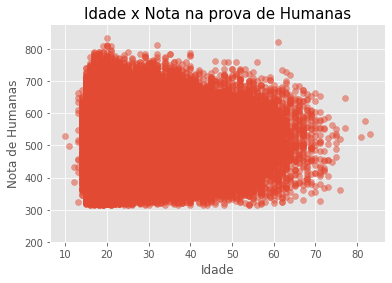

In [36]:
plt.scatter(Enem_MG_2019Prova3['NU_IDADE'], Enem_MG_2019Prova3['NU_NOTA_CH'], alpha=0.5)
plt.title("Idade x Nota na prova de Humanas", size=15)
plt.xlabel("Idade")
plt.ylabel("Nota de Humanas")
plt.ylim(200) #ignorando as notas = 0
plt.show()

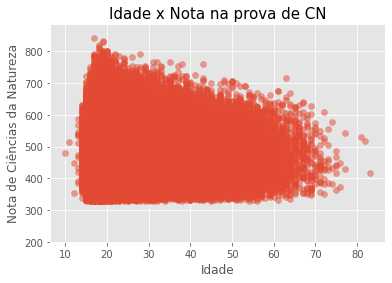

In [37]:
plt.scatter(Enem_MG_2019Prova3['NU_IDADE'], Enem_MG_2019Prova3['NU_NOTA_CN'], alpha=0.5)
plt.title("Idade x Nota na prova de CN", size=15)
plt.xlabel("Idade")
plt.ylabel("Nota de Ciências da Natureza")
plt.ylim(200) #ignorando as notas = 0
plt.show()

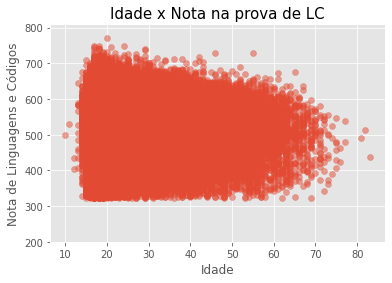

In [38]:
plt.scatter(Enem_MG_2019Prova3['NU_IDADE'], Enem_MG_2019Prova3['NU_NOTA_LC'], alpha=0.5)
plt.title("Idade x Nota na prova de LC", size=15)
plt.xlabel("Idade")
plt.ylabel("Nota de Linguagens e Códigos")
plt.ylim(200) #ignorando as notas = 0
plt.show()

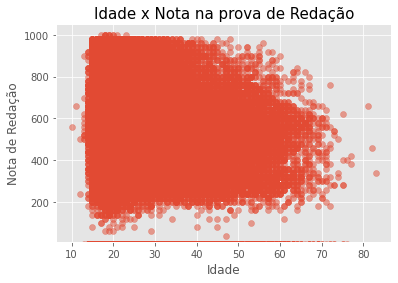

In [63]:
plt.scatter(Enem_MG_2019Prova3['NU_IDADE'], Enem_MG_2019Prova3['NU_NOTA_REDACAO'], alpha=0.5)
plt.title("Idade x Nota na prova de Redação", size=15)
plt.xlabel("Idade")
plt.ylabel("Nota de Redação")
plt.ylim(10) 
plt.show()

Os scaterplots não foram tão infomativos, mas podemos peceber algumas notas altas nas provas de participantes com mais de 50 anos. 

#### Avaliando desempenho de notas nas diferentes provas segundo o sexo dos participantes

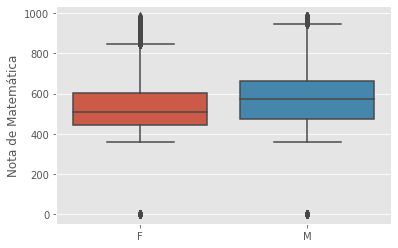

In [39]:
sns.boxplot(x=Enem_MG_2019Prova3['TP_SEXO'], y=Enem_MG_2019Prova3['NU_NOTA_MT'])
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()


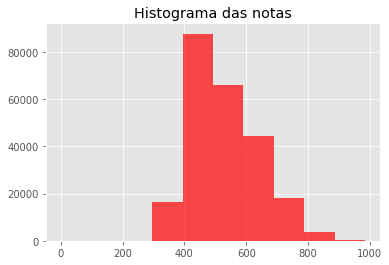

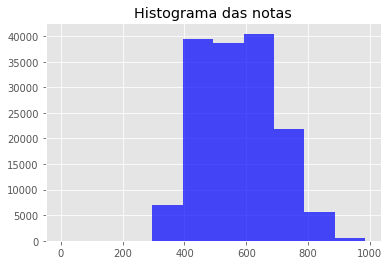

In [42]:
sexo = Enem_MG_2019Prova3[['TP_SEXO', 'NU_NOTA_MT']]
sexo_f = sexo.query('TP_SEXO == "F"')
sexo_m = sexo.query('TP_SEXO == "M"')

plt.hist(sexo_f['NU_NOTA_MT'], alpha=0.7, color='red')
plt.title('Histograma das notas')
plt.show()
plt.hist(sexo_m['NU_NOTA_MT'], alpha=0.7, color='blue')
plt.title('Histograma das notas')
plt.show()

In [64]:
from scipy import stats
from statsmodels.stats import diagnostic

In [68]:
sexo = Enem_MG_2019Prova3[['TP_SEXO', 'NU_NOTA_MT']]
sexo_f = sexo.query('TP_SEXO == "F"').drop('TP_SEXO',axis=1).dropna()
sexo_m = sexo.query('TP_SEXO == "M"').drop('TP_SEXO',axis=1).dropna()

In [72]:
# teste de normalidade: Shapiro-Wilk "p-valor pode não ser acurado para N > 5000"
# teste de normalidade: Lilliefors Test: FALHOU! 

print('sexo_f:',diagnostic.lilliefors(sexo_f))
print('sexo_m:',diagnostic.lilliefors(sexo_m))

sexo_f: (0.07519501394515832, 0.0009999999999998899)
sexo_m: (0.05257763588652642, 0.0009999999999998899)


In [69]:
# Teste U de Mann–Whitney: são estatisticamente diferentes!
stats.mannwhitneyu(sexo_f, sexo_m, alternative='two-sided')

MannwhitneyuResult(statistic=14255762222.5, pvalue=0.0)

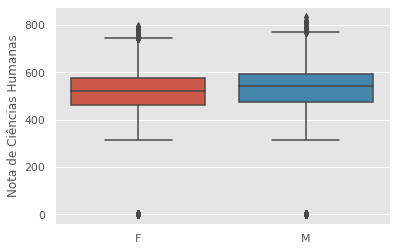

In [163]:
sns.boxplot(x=Enem_MG_2019Prova3['TP_SEXO'], y=Enem_MG_2019Prova3['NU_NOTA_CH'])
plt.xlabel("")
plt.ylabel("Nota de Ciências Humanas")
plt.show()

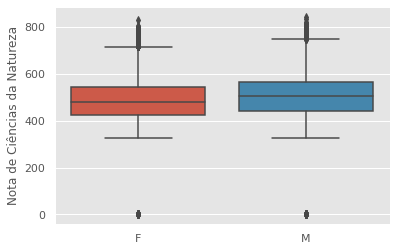

In [170]:
sns.boxplot(x=Enem_MG_2019Prova3['TP_SEXO'], y=Enem_MG_2019Prova3['NU_NOTA_CN'])
plt.xlabel("")
plt.ylabel("Nota de Ciências da Natureza")
plt.show()

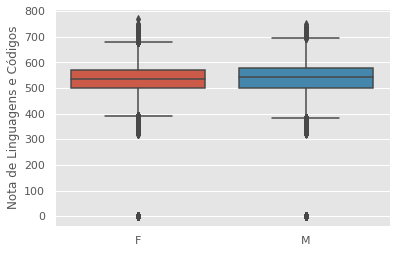

In [164]:
sns.boxplot(x=Enem_MG_2019Prova3['TP_SEXO'], y=Enem_MG_2019Prova3['NU_NOTA_LC'])
plt.xlabel("")
plt.ylabel("Nota de Linguagens e Códigos")
plt.show()

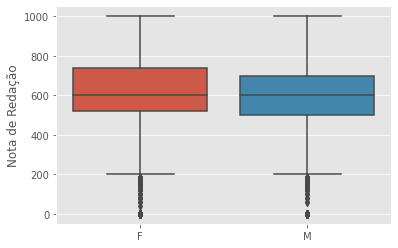

In [55]:
sns.boxplot(x=Enem_MG_2019Prova3['TP_SEXO'], y=Enem_MG_2019Prova3['NU_NOTA_REDACAO'])
plt.xlabel("")
plt.ylabel("Nota de Redação")
plt.show()

Notas e sexo dos participantes:

- a mediana de notas em matemática é maior no grupo masculino;

- porém nas provas de ciências da natureza, ciência humanos e linguagens e códigos as notas não possuem grande diferença entre os diferentes sexos.

#### Avaliando desempenho de notas nas diferentes provas segundo o acesso a internet dos participantes

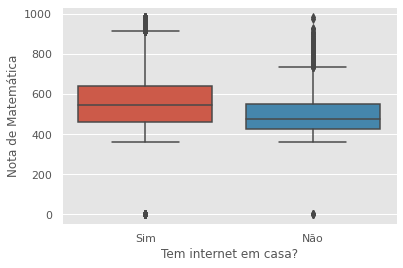

In [171]:
sns.boxplot(x=Enem_MG_2019Prova3['Q025'], y=Enem_MG_2019Prova3['NU_NOTA_MT'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota de Matemática")
plt.show()

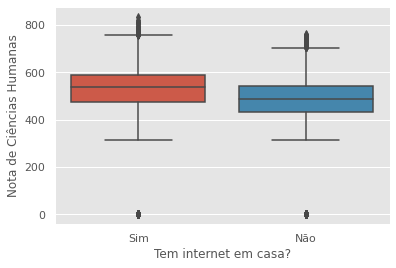

In [172]:
sns.boxplot(x=Enem_MG_2019Prova3['Q025'], y=Enem_MG_2019Prova3['NU_NOTA_CH'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota de Ciências Humanas")
plt.show()

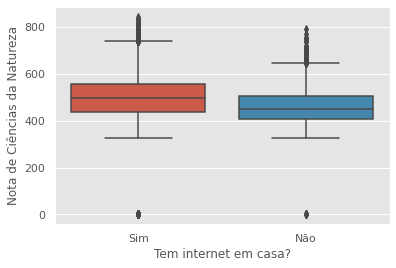

In [173]:
sns.boxplot(x=Enem_MG_2019Prova3['Q025'], y=Enem_MG_2019Prova3['NU_NOTA_CN'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota de Ciências da Natureza")
plt.show()

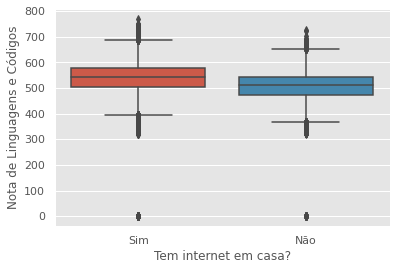

In [174]:
sns.boxplot(x=Enem_MG_2019Prova3['Q025'], y=Enem_MG_2019Prova3['NU_NOTA_LC'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota de Linguagens e Códigos")
plt.show()

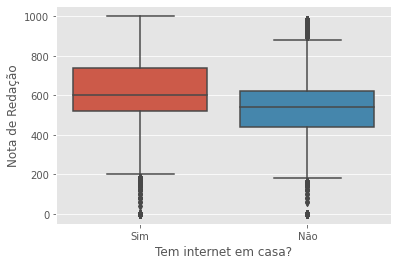

In [56]:
sns.boxplot(x=Enem_MG_2019Prova3['Q025'], y=Enem_MG_2019Prova3['NU_NOTA_REDACAO'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota de Redação")
plt.show()

Nesta análise visualmente vemos uma diferença entre as notas sendo que quem possui acesso a internet tem mediana de notas maiores em todos os componentes do ENEM.

#### Avaliando desempenho de notas nas diferentes provas segundo diferenças de raça dos participantes

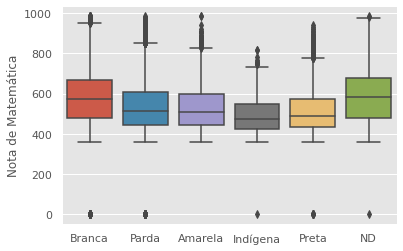

In [176]:
sns.boxplot(x=Enem_MG_2019Prova3['TP_COR_RACA'], y=Enem_MG_2019Prova3['NU_NOTA_MT'])
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()

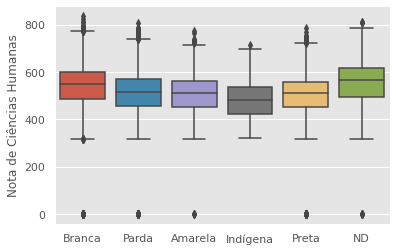

In [177]:
sns.boxplot(x=Enem_MG_2019Prova3['TP_COR_RACA'], y=Enem_MG_2019Prova3['NU_NOTA_CH'])
plt.xlabel("")
plt.ylabel("Nota de Ciências Humanas")
plt.show()

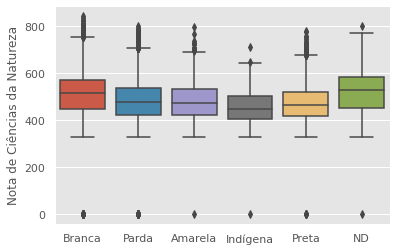

In [178]:
sns.boxplot(x=Enem_MG_2019Prova3['TP_COR_RACA'], y=Enem_MG_2019Prova3['NU_NOTA_CN'])
plt.xlabel("")
plt.ylabel("Nota de Ciências da Natureza")
plt.show()

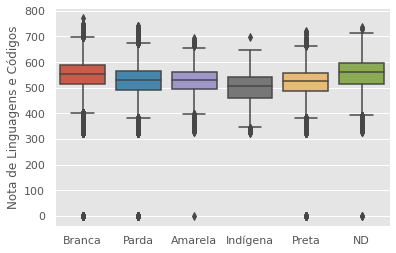

In [179]:
sns.boxplot(x=Enem_MG_2019Prova3['TP_COR_RACA'], y=Enem_MG_2019Prova3['NU_NOTA_LC'])
plt.xlabel("")
plt.ylabel("Nota de Linguagens e Códigos")
plt.show()

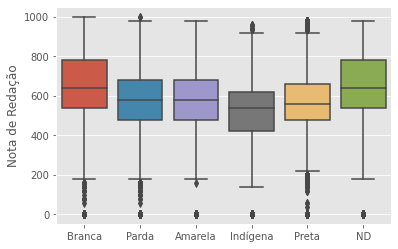

In [57]:
sns.boxplot(x=Enem_MG_2019Prova3['TP_COR_RACA'], y=Enem_MG_2019Prova3['NU_NOTA_REDACAO'])
plt.xlabel("")
plt.ylabel("Nota de Redação")
plt.show()

Inspecionando visualmente as notas segundo a raça percebemos que brancos tem maiores notas.

#### Avaliando desempenho de notas nas diferentes provas segundo renda familiar dos participantes

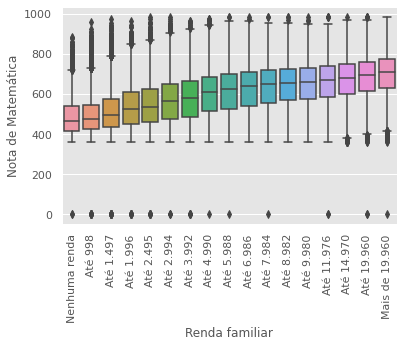

In [182]:
sns.boxplot(x=Enem_MG_2019Prova3['Q006'], y=Enem_MG_2019Prova3['NU_NOTA_MT'], order=["Nenhuma renda", "Até 998", "Até 1.497",
                                 "Até 1.996", "Até 2.495", "Até 2.994", "Até 3.992", "Até 4.990","Até 5.988", "Até 6.986","Até 7.984",
                                 "Até 8.982","Até 9.980","Até 11.976","Até 14.970","Até 19.960","Mais de 19.960"])
plt.xticks(rotation=90)
plt.xlabel("Renda familiar")
plt.ylabel("Nota de Matemática")
plt.show()


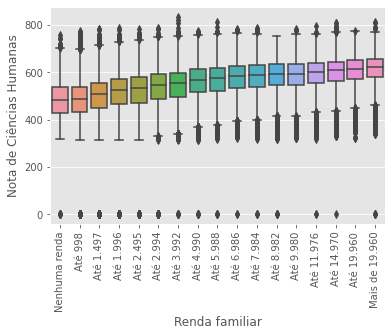

In [43]:
sns.boxplot(x=Enem_MG_2019Prova3['Q006'], y=Enem_MG_2019Prova3['NU_NOTA_CH'], order=["Nenhuma renda", "Até 998", "Até 1.497",
                                 "Até 1.996", "Até 2.495", "Até 2.994", "Até 3.992", "Até 4.990","Até 5.988", "Até 6.986","Até 7.984",
                                 "Até 8.982","Até 9.980","Até 11.976","Até 14.970","Até 19.960","Mais de 19.960"])
plt.xticks(rotation=90)
plt.xlabel("Renda familiar")
plt.ylabel("Nota de Ciências Humanas")
plt.show()

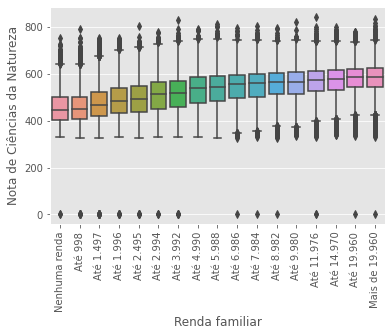

In [44]:
sns.boxplot(x=Enem_MG_2019Prova3['Q006'], y=Enem_MG_2019Prova3['NU_NOTA_CN'], order=["Nenhuma renda", "Até 998", "Até 1.497",
                                 "Até 1.996", "Até 2.495", "Até 2.994", "Até 3.992", "Até 4.990","Até 5.988", "Até 6.986","Até 7.984",
                                 "Até 8.982","Até 9.980","Até 11.976","Até 14.970","Até 19.960","Mais de 19.960"])
plt.xticks(rotation=90)
plt.xlabel("Renda familiar")
plt.ylabel("Nota de Ciências da Natureza")
plt.show()

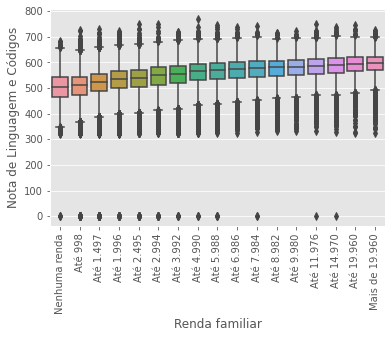

In [45]:
sns.boxplot(x=Enem_MG_2019Prova3['Q006'], y=Enem_MG_2019Prova3['NU_NOTA_LC'], order=["Nenhuma renda", "Até 998", "Até 1.497",
                                 "Até 1.996", "Até 2.495", "Até 2.994", "Até 3.992", "Até 4.990","Até 5.988", "Até 6.986","Até 7.984",
                                 "Até 8.982","Até 9.980","Até 11.976","Até 14.970","Até 19.960","Mais de 19.960"])
plt.xticks(rotation=90)
plt.xlabel("Renda familiar")
plt.ylabel("Nota de Linguagem e Códigos")
plt.show()

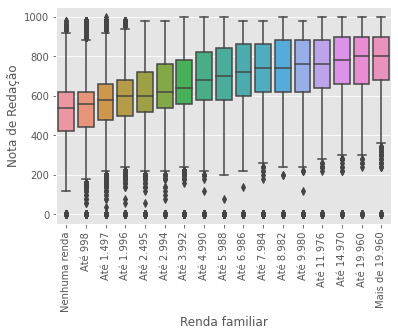

In [58]:
sns.boxplot(x=Enem_MG_2019Prova3['Q006'], y=Enem_MG_2019Prova3['NU_NOTA_REDACAO'], order=["Nenhuma renda", "Até 998", "Até 1.497",
                                 "Até 1.996", "Até 2.495", "Até 2.994", "Até 3.992", "Até 4.990","Até 5.988", "Até 6.986","Até 7.984",
                                 "Até 8.982","Até 9.980","Até 11.976","Até 14.970","Até 19.960","Mais de 19.960"])
plt.xticks(rotation=90)
plt.xlabel("Renda familiar")
plt.ylabel("Nota de Redação")
plt.show()

- há uma relação clara entre o aumento da reenda familiar e o aumento das notas.

#### Média Ponderada das Notas

In [46]:
# mediapond = (NU_NOTA_CN *1 + NU_NOTA_CH *3 +  NU_NOTA_LC *2 + NU_NOTA_MT *1 +  NU_NOTA_REDACAO *3) / 10
    
Enem_MG_2019Prova3["MEDIA_PONDERADA"] = (Enem_MG_2019Prova3["NU_NOTA_CN"] + (Enem_MG_2019Prova3["NU_NOTA_CH"]*3) + (Enem_MG_2019Prova3["NU_NOTA_LC"]*2) + 
                                        Enem_MG_2019Prova3["NU_NOTA_MT"] + Enem_MG_2019Prova3["NU_NOTA_REDACAO"]*3)/10


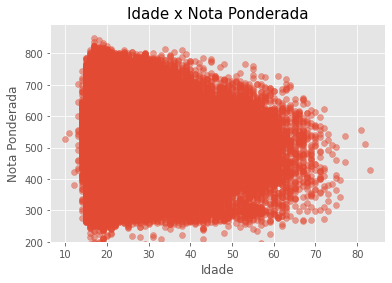

In [47]:
plt.scatter(Enem_MG_2019Prova3['NU_IDADE'], Enem_MG_2019Prova3['MEDIA_PONDERADA'], alpha=0.5)
plt.title("Idade x Nota Ponderada", size=15)
plt.xlabel("Idade")
plt.ylabel("Nota Ponderada")
plt.ylim(200) #ignorando as notas = 0
plt.show()

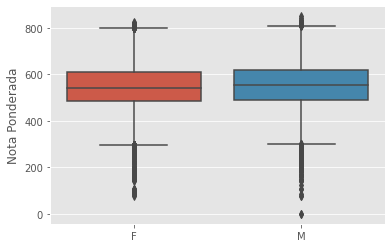

In [48]:
sns.boxplot(x=Enem_MG_2019Prova3['TP_SEXO'], y=Enem_MG_2019Prova3['MEDIA_PONDERADA'])
plt.xlabel("")
plt.ylabel("Nota Ponderada")
plt.show()


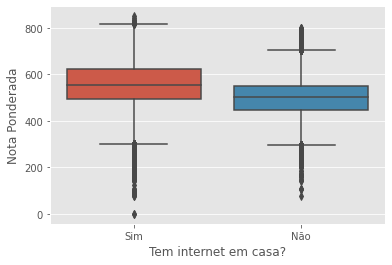

In [49]:
sns.boxplot(x=Enem_MG_2019Prova3['Q025'], y=Enem_MG_2019Prova3['MEDIA_PONDERADA'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota Ponderada")
plt.show()

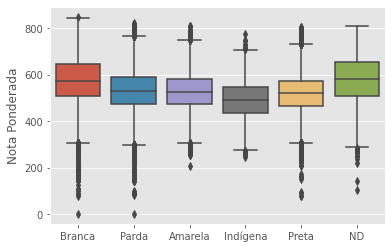

In [50]:
sns.boxplot(x=Enem_MG_2019Prova3['TP_COR_RACA'], y=Enem_MG_2019Prova3['MEDIA_PONDERADA'])
plt.xlabel("")
plt.ylabel("Nota Ponderada")
plt.show()

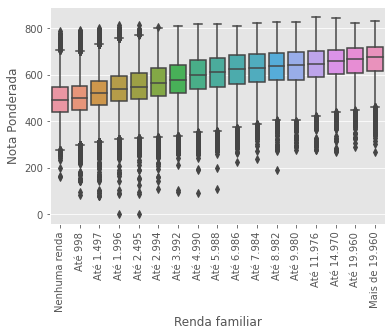

In [51]:
sns.boxplot(x=Enem_MG_2019Prova3['Q006'], y=Enem_MG_2019Prova3['MEDIA_PONDERADA'], order=["Nenhuma renda", "Até 998", "Até 1.497",
                                 "Até 1.996", "Até 2.495", "Até 2.994", "Até 3.992", "Até 4.990","Até 5.988", "Até 6.986","Até 7.984",
                                 "Até 8.982","Até 9.980","Até 11.976","Até 14.970","Até 19.960","Mais de 19.960"])
plt.xticks(rotation=90)
plt.xlabel("Renda familiar")
plt.ylabel("Nota Ponderada")
plt.show()


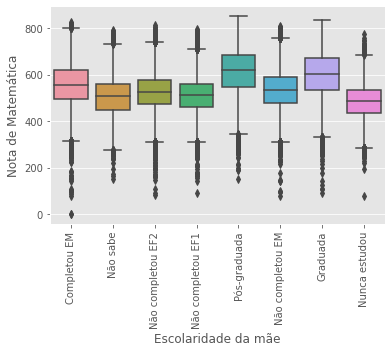

In [73]:
sns.boxplot(x=Enem_MG_2019Prova3['Q002'], y=Enem_MG_2019Prova3['MEDIA_PONDERADA'])
plt.xticks(rotation=90)
plt.xlabel("Escolaridade da mãe")
plt.ylabel("Nota de Matemática")
plt.show()


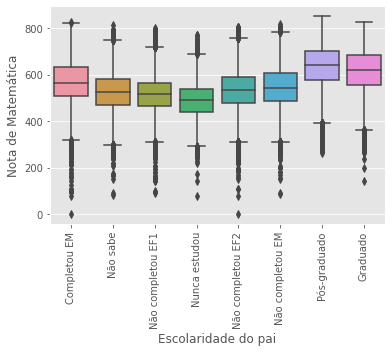

In [74]:
sns.boxplot(x=Enem_MG_2019Prova3['Q001'], y=Enem_MG_2019Prova3['MEDIA_PONDERADA'])
plt.xticks(rotation=90)
plt.xlabel("Escolaridade do pai")
plt.ylabel("Nota de Matemática")
plt.show()


#### Conclusões

Os dados indicam que existe influência entre sexo e/ou gênero do estudante nas notas do ENEM. Também mostram que a facilidade de acesso à internet tem efeitos positivos nessas notas.

Mesmo sem a aplicação de testes estatísticos em todos os casos, como no de notas de matemática onde vemos que as notas dos homens são superiores às notas das mulheres e apresentou que as amostras são estatisticamente diferentes. Com isso, posteriormente pode ser aplicado estes testes para confirmar a tendência de aumento das notas com aumento da renda familiar, escolaridade dos pais, acesso a internet e etc.

Existem estudos sociais que indicam que algumas variáveis são diretamente correlacionadas entre si: renda familiar, acesso a internet e escolaridade dos pais; e raça e classe. Esses estudos também indicam que algumas dessas variáveis estão relacionadas com o acesso à educação de qualidade. Assim como podemos observar que a mediana de notas ponderadas são maiores para quem tepais com ensino superior completo ou pós-graduado.